__Nama Kelompok :__ 
    1. Risya Novita Ramadhani (180441100004)
    2. Syarifatun Miftakhul Rizki (180441100016)

# DOKUMENTASI KIVY

__1. PENGERTIAN KIVY__

    Kivy adalah pustaka python yang gratis dan terbuka untuk mengembangkan aplikasi seluler dan perangkat lunak aplikasi multitouch lainnya dengan antarmuka pengguna alami(NUI). Kivy juga merupakan GUI/NUI framework yang menggunakan bahasa pemrograman Python, dapat dijalankan pada Windows, Linux, OS X, Android dan iOS dengan menggunakan code yang sama dan menggunakan MIT license sehingga 100% free to use dan boleh dikomersialisasikan.
    
__2. CARA INSTALASI KIVY__
Yang pertama :
- Buka command promt , pada tampilan cmd silahkan anda ketik perintah dibawah ini lalu tekan enter

python -m pip install --upgrade pip wheel setuptools

- Jika langkah pertama sudah selesai ketik perintah berikut pada cmd pula, tunggu hingga proses selesai

python -m pip install docutils pygments pypiwin32 kivy.deps.sdl2 kivy.deps.glew

- Sama seperti sebelumya

python -m pip install kivy.deps.gstreamer

- Langkah terakhir

python -m pip install kivy

- Lalu buka aplikasi pycharm, 
- pilih menu file , lalu setting , pilih menu project interpreter
- kemudian instal semua package kivy
- jika sudah sukses terinstall maka kivy bisa digunakan



__3.Hasil Project KIVY__

untuk source codenya :

from kivy.app import App
from kivy.lang import Builder
from kivy.uix.screenmanager import ScreenManager, Screen
from kivy.uix.widget import Widget
from kivy.graphics import Line, Color
from random import random
from kivy.uix.colorpicker import ColorPicker
from kivy.properties import ListProperty
from kivy.uix.popup import Popup

sline = False
bline = False
clr = [1, 1, 0.5, 1]
pre_clr = clr
xs = 0
ys = 0
cs = 0
bs = 0
xboun = 0
yboun = 0
cboun = 0
bboun = 0
rect = False
rect2 = False
press = 0
press2 = 0
wide = 15




def reset1():
    global rect, ell, sline
    rect = ell = sline = False

def reset2():
    global rect2, ell, bline
    rect2 = ell = bline = False

def retclr():
    return clr


def incanvasxy(self, x, y):
    if x > 0.25 * self.width and y > 0.2 * self.height and x < self.width * 0.75 and y < self.height * 0.8:
        return True

def incanvasxyde(self, c, b):
    if c > 0.50 * self.width and b > 0.10 * self.height and c < self.width * 0.100 and b < self.height * 0.8:
        return True

def default(self):
    with self.canvas.after:
        col = [1, 1, 1, 1]
        Color(*col)
        Line(rectangle=(0.25 * self.width - 13, 0.2 * self.height - 13, self.width * 0.5 + 26, self.height * 0.6 + 26),
             width=13)
    with self.canvas:
        col = [0, 0, 0, 1]
        Color(*col)
        Line(rectangle=(0.25 * self.width - 25, 0.2 * self.height - 25, self.width * 0.5 + 50, self.height * 0.6 + 50),
             width=25)


class Painter(Widget):
    col = ListProperty(clr)

    def save(self):
        self.export_to_png("image.png")

    def on_touch_down(self, touch):
        # print "down"
        global xs, ys, xboun, yboun, press, wide
        press = 1
        if incanvasxy(self, touch.x, touch.y):

            self.col = retclr()
            if Widget.on_touch_down(self, touch):
                xs = touch.x
                ys = touch.y
                return True

            with self.canvas:
                Color(*self.col)
                d = 30
                #Line(pos=(touch.x - d / 2,touch.y - d / 2), size=(d,d))
                touch.ud['line'] = Line(points=(touch.x, touch.y), width=wide)
                # if sline:
                xs = touch.x
                ys = touch.y
        else:
            xs = touch.x
            ys = touch.y
        default(self)

    def on_touch_move(self, touch):
        # print "move"
        global xs, ys, xboun, yboun, wide
        if incanvasxy(self, touch.x, touch.y) and incanvasxy(self, xs, ys):
            self.col = retclr()
            if sline:
                if Widget.on_touch_move(self, touch):
                    return True
                with self.canvas.after:
                    self.canvas.after.clear()
                    # if skip > 5:
                    #   Color(*[0,0,0,1])
                    #  Line(points=(xp,yp,xs,ys),width=4)
                    Color(*self.col)
                    Line(points=(touch.x, touch.y, xs, ys), width=wide)
                xboun = touch.x
                yboun = touch.y
            elif rect:
                if Widget.on_touch_move(self, touch):
                    return True
                with self.canvas.after:
                    self.canvas.after.clear()
                    Color(*self.col)
                    Line(rectangle=(xs, ys, touch.x - xs, touch.y - ys), width=wide)
                xboun = touch.x
                yboun = touch.y

            else:
                if incanvasxy(self, xs, ys):
                    touch.ud["line"].points += [touch.x, touch.y]
        default(self)

    def on_touch_up(self, touch):
        # print "up"
        global xs, ys, press, wide

        if incanvasxy(self, xs, ys):
            if incanvasxy(self, touch.x, touch.y):

                if sline:

                    self.col = retclr()

                    if Widget.on_touch_down(self, touch):
                        return True
                    with self.canvas:
                        Color(*self.col)
                        Line(points=(touch.x, touch.y, xs, ys), width=wide)
                if rect:

                    self.col = retclr()

                    if Widget.on_touch_down(self, touch):
                        return True
                    with self.canvas:
                        Color(*self.col)
                        Line(rectangle=(xs, ys, touch.x - xs, touch.y - ys), width=wide)
            else:
                if press:
                    if sline:
                        with self.canvas:
                            if xboun:
                                Color(*self.col)
                                Line(points=(xboun, yboun, xs, ys), width=wide)
                        self.canvas.after.clear()
                    if rect:
                        with self.canvas:
                            if xboun:
                                Color(*self.col)
                                Line(rectangle=(xs, ys, xboun - xs, yboun - ys), width=wide)
                        self.canvas.after.clear()
        self.canvas.after.clear()
        default(self)
        press = 0

# brush 
class Painters(Widget):
    col = ListProperty(clr)

    def save(self):
        self.export_to_png("image.png")

    def on_touch_down(self, touchs):
        # print "down"
        global cs, bs, cboun, bboun, press2, wide
        press2 = 1
        if incanvasxyde(self, touchs.c, touchs.b):

            self.col = retclr()
            if Widget.on_touchs_down(self, touchs):
                cs = touchs.c
                bs = touchs.b
                return False

            with self.canvas:
                Color(*self.col)
                d = 30
                #Line(pos=(touch.x - d / 2, touch.y - d / 2), size=(d, d))
                touchs.ud['line'] = Line(points=(touchs.c, touchs.b), width=wide + 10)
                # if sline:
                cs = touchs.c
                bs = touchs.b
        else:
            cs = touchs.c
            bs = touchs.b
        default(self)
def on_touch_moves(self, touchs):
    # print "move"
    global cs, bs, cboun, bboun, wide
    if incanvasxyde(self, touchs.c, touchs.b) and incanvasxyde(self, cs, bs):
        self.col = retclr()
        if bline:
            if Widget.on_touchs_move(self, touchs):
                return False
            with self.canvas.after:
                self.canvas.after.clear()
                # if skip > 5:
                #   Color(*[0,0,0,1])
                #  Line(points=(xp,yp,xs,ys),width=4)
                Color(*self.col)
                Line(points=(touchs.c, touchs.b, cs, bs), width=wide + 10)
            cs = touchs.c
            bs = touchs.b
        elif rect2:
            if Widget.on_touchs_move(self, touchs):
                return False
            with self.canvas.after:
                self.canvas.after.clear()
                Color(*self.col)
                Line(rectangle=(cs, bs, touchs.c - cs, touchs.b - bs), width=wides)
            cs = touchs.c
            bs = touchs.b

        else:
            if incanvasxyde(self, cs, bs):
                touchs.ud["line"].points += [touchs.c, touchs.b]
    default(self)
def on_touch_ups(self, touchs):
    # print "up"
    global cs, bs, press, wides

    if incanvasxyde(self, cs, bs):
        if incanvasxyde(self, touchs.c, touchs.b):

            if bline:

                self.col = retclr()

                if Widget.on_touchs_down(self, touchs):
                    return False
                with self.canvas:
                    Color(*self.col)
                    Line(points=(touchs.c, touchs.b, cs, bs), width=wide + 10)
            if rect2:

                self.col = retclr()

                if Widget.on_touchs_down(self, touchs):
                    return False
                with self.canvas:
                    Color(*self.col)
                    Line(rectangle=(cs, bs, touchs.c - cs, touchs.b - bs), width=wide + 10)
        else:
            if press2 :
                if bline:
                    with self.canvas:
                        if cboun:
                            Color(*self.col)
                            Line(points=(cboun, bboun, cs, bs), width=wide + 10)
                    self.canvas.after.clear()
                if rect2 :
                    with self.canvas:
                        if cboun:
                            Color(*self.col)
                            Line(rectangle=(cs, bs, cboun - cs, bboun - bs), width=wide + 10)
                    self.canvas.after.clear()
    self.canvas.after.clear()
    default(self)
    press2 = 0


class Cpicker(ColorPicker):
    pass


class popup1(Popup):
    def hello(self, y):
        global clr, pre_clr
        pre_clr = clr
        clr = y

class popup2(Popup):
    def hello(self, b):
        global clr, pre_clr
        pre_clr = clr
        clr = b


class MainScreen(Screen):

    def open_it1(self):
        popup1().open()

    def open_it2(self):
        popup2().open()

    def eraser(self):
        global clr, pre_clr, sline, bline
        reset1()
        reset2()
        pre_clr = clr
        clr = [0, 0, 0, 1]

    def thick(self, *args):
        global wide
        wide = args[1]
        self.lab.text = "Width : " + str(args[1])

    def thicks(self, *args):
        global wides
        wides = args[5]
        self.lab.text = "Width : " + str(args[5])

    def pencil(touch):
        global clr, pre_clr, sline
        clr = pre_clr
        reset1()

    def brush(touchs):
        global clr, pre_clr, bline
        clr = pre_clr
        reset2()

    def sl(self):
        global sline,bline, rect, pre_clr, clr
        reset1()
        reset2()
        clr = pre_clr
        sline = True
        bline = False

    def rect(self):
        global rect, sline, pre_clr, clr
        reset1()
        clr = pre_clr
        rect = True

    def rect2(self):
        global rect2, bline,  pre_clr, clr
        reset2()
        clr = pre_clr
        rect2 = False


class ScreenManagement(ScreenManager):
    pass


presentation = Builder.load_file("kvf.kv")


class painApp(App):
    def build(self):
        print("start")
        return presentation


if __name__ == "__main__":
    painApp().run()

 * Hasil Programnya :  
![](./image/13.png) 
![](./image/14.png)
__4.STRUKTUR CLASS KIVY PENJELASANNYA __

__Paint__
![](./image/15.png)
![](./image/16.png)
![](./image/17.png)
![](./image/18.png)
![](./image/19.png)
__5. IMPLEMENTASI MATERI OOP PADA PROJECT KIVY__

    Class merupakan blueprint dari object. class digunakan hanya untuk membuat kerangka dasar yang akan kita pakai nantinya adalah hasil cetakan dari class yakni object. sedangkan properti adalah data yang terdapat dalam sebuah class. Method adalah tindakan yang bisa dilakukan didalam class, method pada dasarnya adalah function. sedangkan object sendiri adalah hasil cetak dari class, atau hasil konkrit dari class.
    untuk program kivy kali ini menggunakan konsep inheritance atau turunan dan lebih spesifik menggunakan tipe inheritance super.

  

  
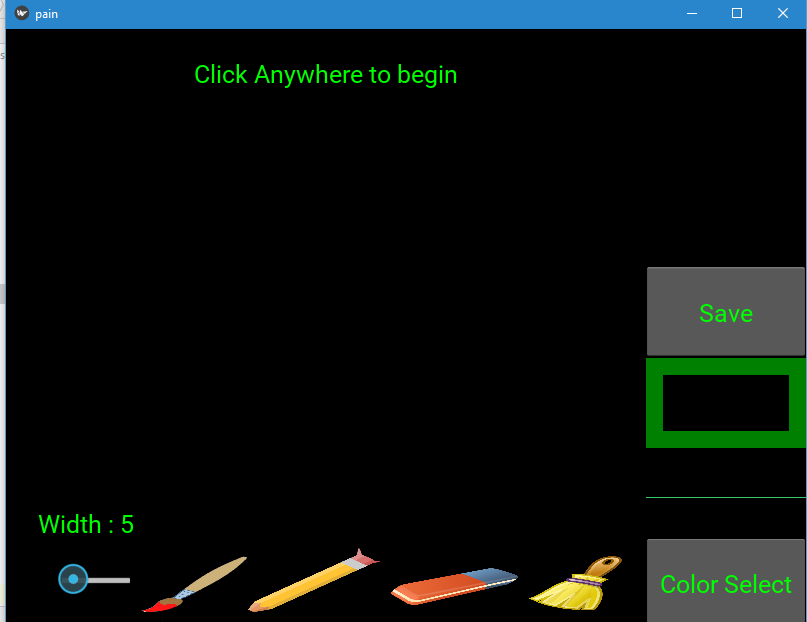
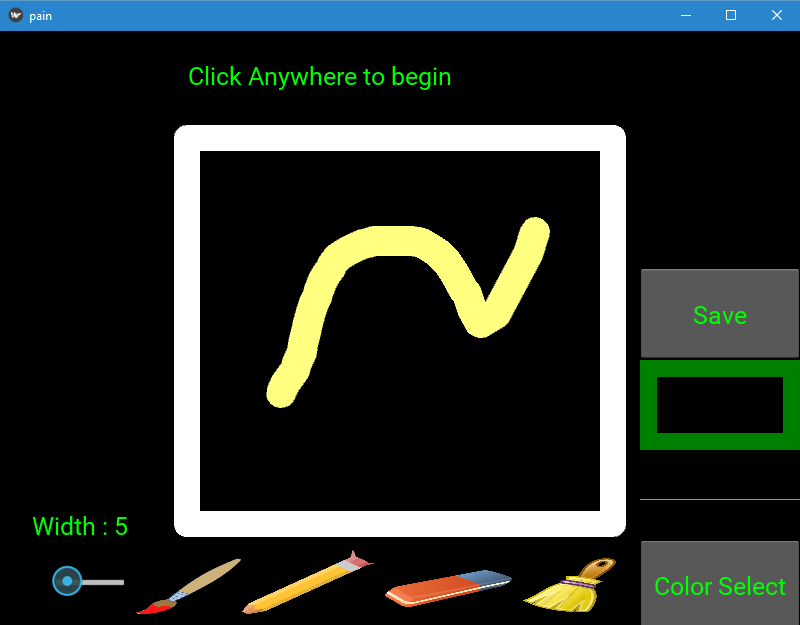
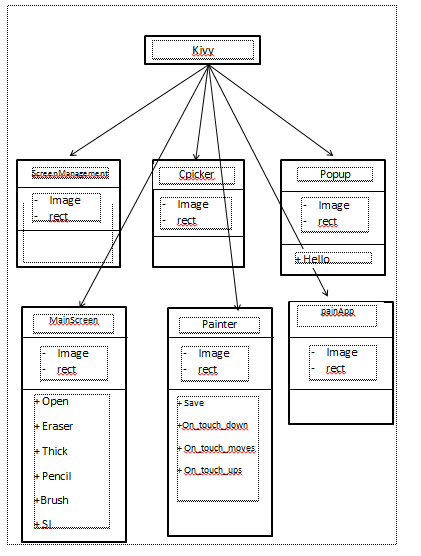
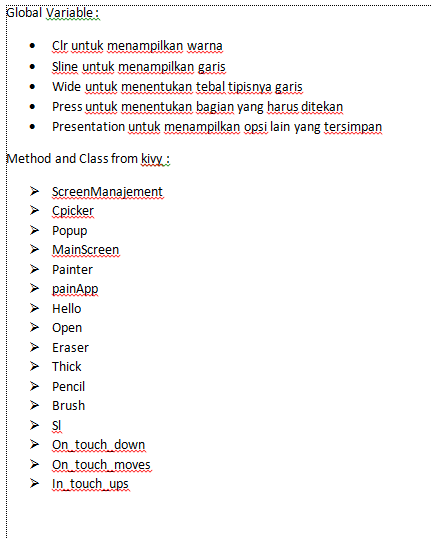
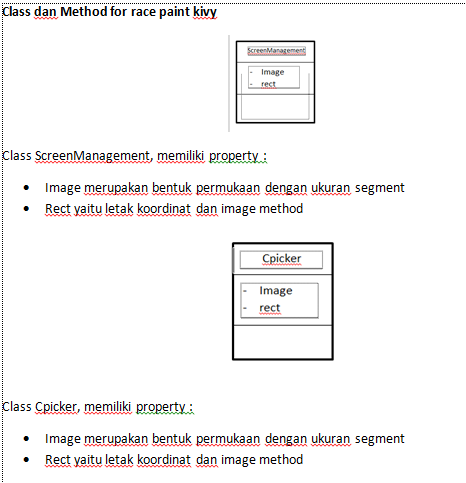
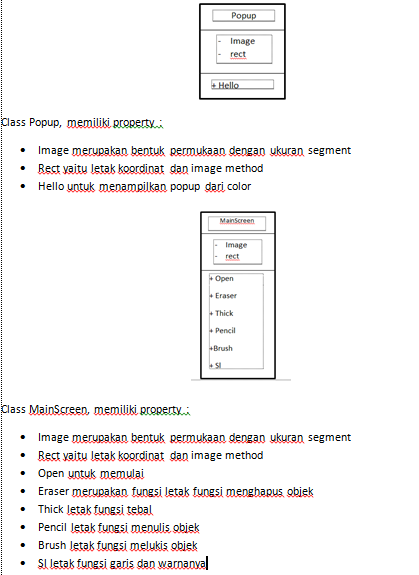
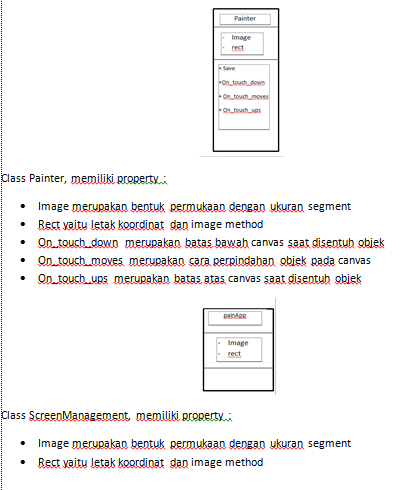